# **What are URL Template Tags in Django?**

**In Django, the {% url %} template tag is used to dynamically generate URLs in your HTML templates using the name of the view (not the hardcoded URL path). This makes your templates more robust and maintainable.**

# **Example Setup:**

# **urls.py**



```
from django.urls import path
from . import views

urlpatterns = [
    path('', views.home, name='home'),
    path('about/', views.about, name='about'),
    path('blog/<int:id>/', views.blog_detail, name='blog-detail'),
]

```



**Note:name indicate the access of Urls**

# **views.py**



```

from django.shortcuts import render

def home(request):
    return render(request, 'home.html')

def about(request):
    return render(request, 'about.html')

def contact(request):
    return render(request, 'contact.html')

```



# **template.html**



```
<!-- Link to home -->
<a href="{% url 'home' %}">Home</a>

<!-- Link to about -->
<a href="{% url 'about' %}">About Us</a>

<!-- Link to blog detail with ID 5 -->
<a href="{% url 'blog-detail' 5 %}">View Blog 5</a>

```



# **✅ Benefits of {% url %}:**

**You avoid hardcoding URLs.**

If you change the path in urls.py, your templates will still work.

It supports dynamic routing (with arguments like id).

# **highlight the active link**

**To highlight the active link in Django (for example, in the navbar), you can use the {% url %} tag and compare it with the current request path using request.path.**

# **✅ Steps to Highlight Active Link in Django**

1. **Enable request in Templates**

In settings.py, make sure this is added:



```
TEMPLATES = [
    {
        ...
        'OPTIONS': {
            'context_processors': [
                ...
                'django.template.context_processors.request',
            ],
        },
    },
]

```



**2. HTML Example for Active Link**



```
<!-- header.html -->
<ul class="navbar">
    <li class="{% if request.path == '/' %}active{% endif %}">
        <a href="{% url 'home' %}">Home</a>
    </li>
    <li class="{% if request.path == '/about/' %}active{% endif %}">
        <a href="{% url 'about' %}">About</a>
    </li>
    <li class="{% if request.path == '/contact/' %}active{% endif %}">
        <a href="{% url 'contact' %}">Contact</a>
    </li>
</ul>

```



**3.CSS for Highlighting**



```
.active a {
    color: red; /* or any other style */
    font-weight: bold;
}

```



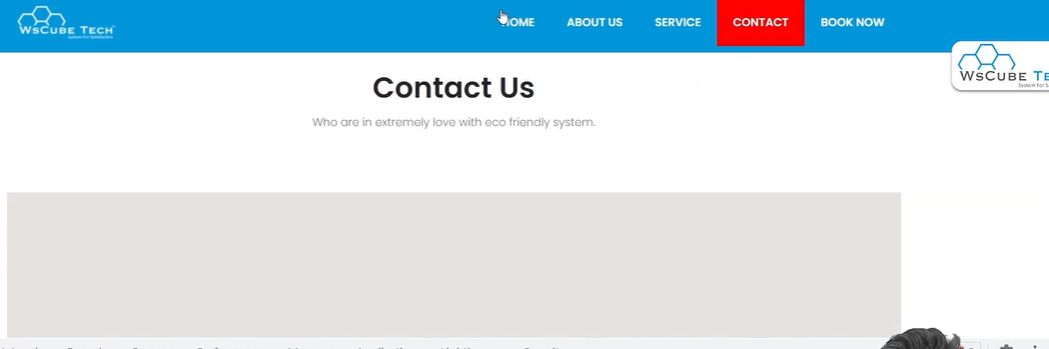

# **what is mean by GET method?**

**The GET method sends the encoded user information appended to the page request. The page and the encoded information are separated by the ? character.**

https://www.wscubetech.com/index.php?name1=value1&name2=value2

Restricted to send up to 1024 characters only.

Never use GET method if you have password or other sensitive information.

Cannot be used to send binary data, like images or word documents, to the server.



# **what is Mean by POST Method?**

**The POST method transfers information via HTTP headers. The information is encoded as described in case of GET method and put into a header called QUERY_STRING.**

**Data is sent in the HTTP request body**

Does not have any restriction on data size to be sent.

Can be used to send ASCII as well as binary data.

The data sent by POST method goes through HTTP header so security depends on HTTP protocol.

By using Secure HTTP, you can make sure that your information is secure.

# **To implement a GET method form**

# views.py



```
from django.http import HttpResponse
from django.shortcuts import render

def my_get_form(request):
    name = request.GET.get('name')  # Get 'name' from URL query
    if name:
        return HttpResponse(f"<h2>Hello, {name}!</h2>")
    return render(request, 'form.html')

```



# form.html



```
<!DOCTYPE html>
<html>
<head>
    <title>GET Form</title>
</head>
<body>
    <h2>Enter your name:</h2>
    <form method="get">
        <input type="text" name="name" placeholder="Your name">
        <input type="submit" value="Submit">
    </form>
</body>
</html>

```



# urls.py



```
from django.urls import path
from .views import my_get_form

urlpatterns = [
    path('getform/', my_get_form),
]

```





```
http://localhost:8000/getform/?name=Alice

```



# **what is mean by CSRF (Cross-Site Request Forgery)?**

CSRF is like someone tricking you into clicking a button or submitting a form on a website you're logged into, but you didn't actually want to do it. For example, imagine you're logged into your bank account, and a hacker makes you unknowingly click a button that transfers money from your account.

To stop this from happening, Django uses something called a CSRF token. Think of it like a special password that is hidden inside forms on the website. When you submit a form, the website checks if you have the correct token. If it doesn't match, the form won't be submitted, making sure only the right user can make changes.

# **Implementing a POST Method Form with CSRF Token in Django**
Here’s how you can implement a POST form with CSRF protection in Django.

# **Create a Form in forms.py**

First, create a simple form that accepts the user's name:





```
# forms.py
from django import forms

class NameForm(forms.Form):
    name = forms.CharField(max_length=100, label="Enter your name")

```



# **Create a View in views.py**
Next, create a view to handle both GET and POST requests. It will display the form and handle form submissions.



```
# views.py
from django.shortcuts import render
from .forms import NameForm

def name_view(request):
    if request.method == 'POST':
        form = NameForm(request.POST)
        if form.is_valid():
            name = form.cleaned_data['name']
            return render(request, 'thanks.html', {'name': name})
    else:
        form = NameForm()

    return render(request, 'name_form.html', {'form': form})

```



# **Create Templates for the Form and Result**
name_form.html: This template shows the form and includes the CSRF token.




```
<!-- name_form.html -->
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Submit your name</title>
</head>
<body>
    <h2>Enter your name:</h2>
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Submit</button>
    </form>
</body>
</html>

```



# thanks.html:
This template displays a thank you message after the form is submitted.




```
<!-- thanks.html -->
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Thanks</title>
</head>
<body>
    <h2>Thank you, {{ name }}!</h2>
</body>
</html>

```



# **Set Up the URL in urls.py**
Configure the URL pattern to link to the view.



```
# urls.py
from django.urls import path
from .views import name_view

urlpatterns = [
    path('name/', name_view, name='name_view'),
]

```





```
Enter your name:
[ ________________________ ]  (input field for the name)
[Submit]  (submit button)

```





```
Thank you, Alice!

```

